Ejercicio 1 - Fundamentos de Sistemas de Stock y Flujo

1. Defina de teoricamente los siguientes términos de forma clara

    a. Stock
    Es una variable que representa una acumulación en el tiempo, el nivel de una cantidad en un momento dado, como la población en una ciudad.

    b. Flujo
    Es una tasa de cambio que afecta a los stocks. Puede ser de entrada (aumenta el stock) o de salida (lo disminuye). 

    c. Bucle de retroalimentación
    Es una estructura en la que una parte de la salida del sistema regresa como entrada, afectando su comportamiento futuro. Puede ser balanceado que estabiliza el sistema o reforzado que lo amplifica.




2. Defina con notación matemática y explique lo siguiente

    a. Ecuación de acumulación de stock
    dS/dt =Fin−Fout

    S = Stock
    Fin = Flujo de entrada
    Fout = Flujo de salida

    La ecuación indica que el cambio del stock en el tiempo depende de la diferencia entre los flujos de entrada y salida​.

    b. Análisis dimensional de tasa de flujo
    El flujo se mide como cantidad por unidad de tiempo:
    [𝐹] = cantidad / tiempo (por ejemplo, personas/día)

    c. Forma de solución de decaimiento exponencial
    S(t)=S0e^−αt
    
    S0 = valor inicial
    α = tasa de decaimiento
    t = tiempo
    
    Este modelo describe cómo un stock disminuye de forma continua en el tiempo a una tasa proporcional a su valor actual.

3. Compare y explique las diferencias de:

    a. Modelado de tiempo contínuo vs modelado de tiempo discreto

    Tiempo continuo: El sistema se modela con ecuaciones diferenciales. El tiempo fluye sin interrupciones.
    Tiempo discreto: Se utiliza una secuencia de intervalos. Se modela con ecuaciones en diferencias.

    b. Retroalimentación balanceada vs reforzada

    Balanceada (negativa): Tiende a estabilizar el sistema. Ej.: regulación de temperatura.
    Reforzada (positiva): Aumenta los cambios en el sistema. Ej.: crecimiento poblacional sin límites.

4. Interprete el significado de la constante de tiempo τ=1/α en sistemas del mundo real (por ejemplo,
descomposición de la población, metabolismo de fármacos).

    La constante de tiempo τ indica el tiempo que tarda un sistema en responder significativamente a un cambio. Es el tiempo en el que el valor del stock decae aproximadamente al 37% de su valor inicial.

    Ejemplo del mundo real:
    En demografía, describe la velocidad con la que una población se estabiliza tras un cambio.

Parte práctica

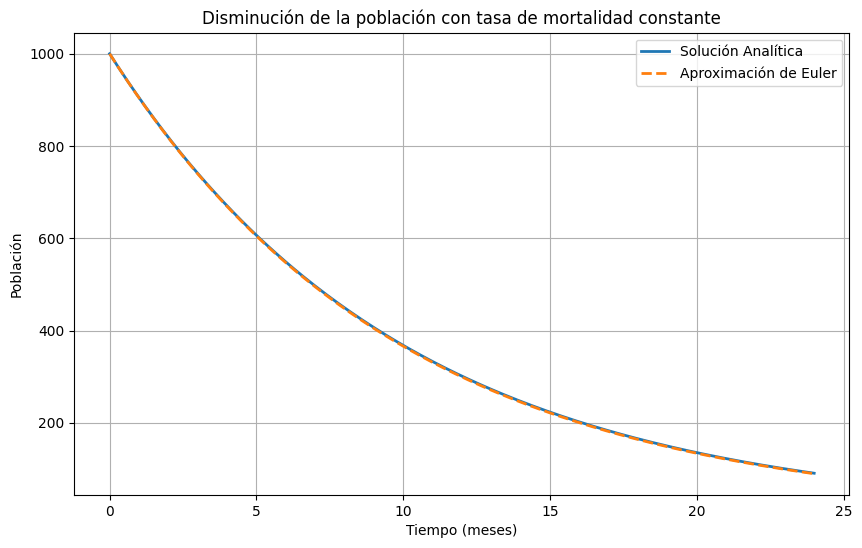

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del modelo
S0 = 1000               # Población inicial
alpha = 0.1             # Tasa de mortalidad (1/mes)
T = 24                  # Horizonte de tiempo en meses
dt = 0.1                # Paso de tiempo para Euler
n_steps = int(T / dt)   # Número de pasos

# Inicialización de variables
tiempo = np.linspace(0, T, n_steps + 1)
S_euler = np.zeros(n_steps + 1)
S_exacta = np.zeros(n_steps + 1)
S_euler[0] = S0

# Método de Euler
for i in range(n_steps):
    dS = -alpha * S_euler[i]
    S_euler[i + 1] = S_euler[i] + dS * dt

# Solución analítica
S_exacta = S0 * np.exp(-alpha * tiempo)

# Gráfico
plt.figure(figsize=(10, 6))
plt.plot(tiempo, S_exacta, label='Solución Analítica', linewidth=2)
plt.plot(tiempo, S_euler, '--', label='Aproximación de Euler', linewidth=2)
plt.title('Disminución de la población con tasa de mortalidad constante')
plt.xlabel('Tiempo (meses)')
plt.ylabel('Población')
plt.grid(True)
plt.legend()
plt.show()


a. ¿Cómo afecta un Δt menor a la precisión?
    Un valor de Δt menor mejora la precisión del modelo porque reduce el error numérico de cada paso. En métodos como el de Euler, un paso más pequeño permite que la aproximación siga más de cerca la trayectoria real del sistema continuo.

b. ¿Qué ocurre si un Δt es demasiado grande (p. ej., Δt = 5 meses)?
Un Δt grande puede generar una simulación inestable o imprecisa. La aproximación puede desviarse notablemente de la solución real e incluso producir resultados no realistas, como poblaciones negativas o curvas con forma errónea. Además, el método podría no captar cambios importantes que ocurren entre pasos grandes de tiempo.